# Potential Analyses:

    Text Preprocessing:
        Cleaning and preprocessing the text data by removing stop words, punctuation, and applying techniques like stemming or lemmatization.

    Feature Extraction:
        Converting text data into numerical features using methods like TF-IDF, bag-of-words, or word embeddings.

    Model Building:
        Building classification models such as Logistic Regression, Naive Bayes, or more advanced methods like Support Vector Machines or Neural Networks to predict whether a message is spam or ham.

    Performance Evaluation:
        Evaluating the performance of the models using metrics like accuracy, precision, recall, and F1-score.

Purpose of the Dataset:

This dataset is typically used for binary classification tasks where the goal is to differentiate between spam and ham messages based on the content of the text column. It is often used to train and evaluate machine learning models for spam detection.

In [4]:
!pip install nltk

In [173]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sylvie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sylvie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
# If you have categorical columns, check their unique values
for column in spam.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}: {spam[column].unique()}")


Unique values in Class: ['ham' 'spam']
Unique values in text: ['go jurong point crazi avail bugi n great worl la e buffet cine got amor wat'
 'ok lar joke wif u oni'
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionst txt ratetc appli 08452810075over18'
 ... 'piti moo soani suggest'
 'guy bitch act like interest buy someth el next week gave u free'
 'rofl true name']
Unique values in text_processed: ['go jurong point crazi avail bugi n great worl la e buffet cine got amor wat'
 'ok lar joke wif u oni'
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionst txt ratetc appli 08452810075over18'
 ... 'piti moo soani suggest'
 'guy bitch act like interest buy someth el next week gave u free'
 'rofl true name']


In [123]:
spam = pd.read_csv(r"\\wsl.localhost\Ubuntu-22.04\home\tomcat\Portfolio Machine learning\Data Manipulation\Spam\spam (1).csv")
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [125]:
spam.rename(columns={'Category':'Class', 'Message': 'text'}, inplace=True)
spam.head()

,Class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [127]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [129]:
spam.describe()

,Class,text
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [131]:
spam['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [133]:
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews

In [135]:
spam['text']=spam['text'].apply(lambda x:expand_contractions(x))

# Lowercasing

In [138]:
if 'text' in spam.columns:
    spam['text_processed'] = spam['text'].str.lower()
else:
    print("Column 'text' not found in the dataset.")

In [140]:
spam['text_processed'][0]

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

# Removing Punctuation and Special Characters

In [143]:
if 'text_processed' in spam.columns:
    spam['text_processed'] = spam['text_processed'].str.translate(str.maketrans('', '', string.punctuation))
else:
    print("'text_processed' column is not defined after Step 1.")

In [145]:
spam['text_processed'][0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

# remove stopwords

In [148]:
from nltk.corpus import stopwords

if 'text_processed' in spam.columns:
    stop_words = set(stopwords.words('english'))
    spam['text_processed'] = spam['text_processed'].apply(lambda x: ' '.join(
        word for word in x.split() if word not in stop_words))
else:
    print("'text_processed' column is not defined after Step 2.")

In [150]:
spam['text_processed'][0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

# Tokenization

In [153]:
if 'text_processed' in spam.columns:
    spam['text_tokenized'] = spam['text_processed'].apply(word_tokenize)
else:
    print("'text_processed' column is not defined after Step 3.")

In [155]:
spam['text_processed'][0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

# stemming

In [158]:
if 'text_tokenized' in spam.columns:
    stemmer = PorterStemmer()
    spam['text_stemmed'] = spam['text_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
else:
    print("'text_tokenized' column is not defined after Step 4.")

In [160]:
spam['text_processed'][0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

#  Remove extra whitespace and join tokens back

In [165]:
if 'text_stemmed' in spam.columns:
    spam['text_final'] = spam['text_stemmed'].apply(lambda x: ' '.join(x))
else:
    print("'text_stemmed' column is not defined after Step 5.")

In [167]:
spam['text_processed'][0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

#  Display the first few rows of the processed text

if 'text_final' in spam.columns:
    print(spam[['text', 'text_final']].head())
else:
    print("'text_final' column is not defined after Step 6.")

# Class Distribution Analysis

1. Count the Number of Instances in Each Class.

2. Visualize the Class Distribution using a bar plot to better understand the distribution between 'ham' and 'spam'.

In [179]:
# Step 1: Count the number of instances in each class
class_distribution = spam['Class'].value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 Class
ham     4825
spam     747
Name: count, dtype: int64


C:\Users\Sylvie\AppData\Local\Temp\ipykernel_24760\1622552916.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


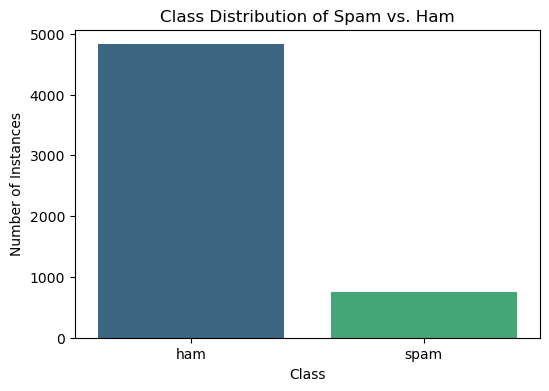

In [181]:
# Step 2: Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Class Distribution of Spam vs. Ham')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

Count the Instances:

    spam_data['Class'].value_counts(): This command counts the number of occurrences of each class (ham and spam) in the dataset.

Visualize with Bar Plot:

    A bar plot is created using Seaborn to show the number of messages labeled as ham and spam.

# Feature Extraction with TF-IDF

TF-IDF is a numerical representation of text that highlights the importance of words in the context of the entire corpus. It helps to down-weight commonly used words and highlight rare, more meaningful words.
Steps to Apply TF-IDF:

    Import Necessary Libraries.
    Initialize the TF-IDF Vectorizer.
    Fit and Transform the Text Data into TF-IDF features.
    Create a DataFrame to display the TF-IDF feature matrix.

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features for performance

# Step 2: Fit and transform the text data into TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(spam['text_final'])  # Replace 'text_final' with 'text' if not preprocessed

# Step 3: Create a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF feature matrix
print("TF-IDF Feature Matrix (first 5 rows):")
print(tfidf_df.head())

TF-IDF Feature Matrix (first 5 rows):
   008704050406  01223585334  020603  0207  02070836089  02072069400  \
0           0.0          0.0     0.0   0.0          0.0          0.0   
1           0.0          0.0     0.0   0.0          0.0          0.0   
2           0.0          0.0     0.0   0.0          0.0          0.0   
3           0.0          0.0     0.0   0.0          0.0          0.0   
4           0.0          0.0     0.0   0.0          0.0          0.0   

   02073162414  020903  021  0578  ...   yr  ystrdayic  yummi  yun  yunni  \
0          0.0     0.0  0.0   0.0  ...  0.0        0.0    0.0  0.0    0.0   
1          0.0     0.0  0.0   0.0  ...  0.0        0.0    0.0  0.0    0.0   
2          0.0     0.0  0.0   0.0  ...  0.0        0.0    0.0  0.0    0.0   
3          0.0     0.0  0.0   0.0  ...  0.0        0.0    0.0  0.0    0.0   
4          0.0     0.0  0.0   0.0  ...  0.0        0.0    0.0  0.0    0.0   

   yuo  yup  zed  zoe  üll  
0  0.0  0.0  0.0  0.0  0.0  
1  0.0  

Explanation:

    TF-IDF Vectorizer:
        max_features=5000: Limits the number of features to 5000 to reduce dimensionality and improve performance. Adjust as needed.

    Fit and Transform:
        fit_transform(): Fits the vectorizer to the text data and then transforms the text into a TF-IDF matrix.

    Feature Matrix:
        tfidf_features.toarray(): Converts the sparse matrix into a dense format for visualization.
        columns=tfidf_vectorizer.get_feature_names_out(): Sets the column names to the extracted features (words).

#  Balancing the dataset and then Building a classification model.

Next Steps:

    Balancing the Dataset:
        We will use oversampling, undersampling, or synthetic methods (like SMOTE) to balance the dataset based on the extracted TF-IDF features.

    Splitting the Data:
        Split the data into training and testing sets to evaluate model performance.

    Building and Training a Classification Model:
        Use a machine learning model like Logistic Regression or Naive Bayes for classification.

    Evaluating the Model:
        Assess the performance using metrics like accuracy, precision, recall, and F1-score.

### Balancing the Dataset with Oversampling

In [199]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Step 1: Define the features (X) and the target (y)
X = tfidf_features  # TF-IDF features from the previous step
y = spam['Class']  # Class labels ('ham' and 'spam')

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Apply Random Oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

# Step 4: Verify the new class distribution
print("Original class distribution in training set:\n", y_train.value_counts())
print("Balanced class distribution in training set:\n", y_train_balanced.value_counts())


Original class distribution in training set:
 Class
ham     3377
spam     523
Name: count, dtype: int64
Balanced class distribution in training set:
 Class
spam    3377
ham     3377
Name: count, dtype: int64


Explanation:

    Splitting the Data:
        train_test_split: Splits the data into training (70%) and testing (30%) sets while maintaining the class distribution (stratify=y).

    Random Oversampling:
        RandomOverSampler: Creates additional instances of the minority class (spam) to balance the dataset.

    Balanced Class Distribution:
        The new class distribution of the balanced training set is displayed to confirm the oversampling.

### Model Training

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 5: Train a Logistic Regression model on the balanced dataset
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Step 6: Predict on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9760765550239234
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1448
        spam       0.92      0.90      0.91       224

    accuracy                           0.98      1672
   macro avg       0.95      0.94      0.95      1672
weighted avg       0.98      0.98      0.98      1672



Interpretation of the Model Performance:

    Accuracy:
        The overall accuracy of the model is 97.6%. This means that the model correctly classified approximately 97.6% of the messages in the test set.

    Precision, Recall, and F1-Score:

        These metrics are provided for both classes (ham and spam):

        Ham Class (ham):
            Precision: 0.98 (98%)
                Out of all the messages predicted as ham, 98% were actually ham.
            Recall: 0.99 (99%)
                Out of all the actual ham messages, 99% were correctly identified by the model.
            F1-Score: 0.99 (99%)
                This is the harmonic mean of precision and recall, indicating a very high balance between them.

        Spam Class (spam):
            Precision: 0.92 (92%)
                Out of all the messages predicted as spam, 92% were actually spam.
            Recall: 0.90 (90%)
                Out of all the actual spam messages, 90% were correctly identified by the model.
            F1-Score: 0.91 (91%)
                This indicates a good balance between precision and recall for the spam class as well.

    Support:
        Ham (ham): There were 1448 actual ham messages in the test set.
        Spam (spam): There were 224 actual spam messages in the test set.

    Macro Average:
        Averages the metrics (precision, recall, F1-score) equally for both classes, regardless of the class size.
        Precision: 0.95, Recall: 0.94, F1-Score: 0.95.

    Weighted Average:
        Averages the metrics while considering the support (number of instances) for each class.
        Precision: 0.98, Recall: 0.98, F1-Score: 0.98.
        This metric is more representative of the overall performance since it accounts for the imbalance in class distribution.

Overall Analysis:

    The model performs very well on the test set with high accuracy and strong metrics for both classes.
    Ham Class: Excellent performance with very high precision, recall, and F1-score.
    Spam Class: Good performance, but slightly lower precision and recall compared to the ham class, likely due to the initial class imbalance and fewer examples of spam.

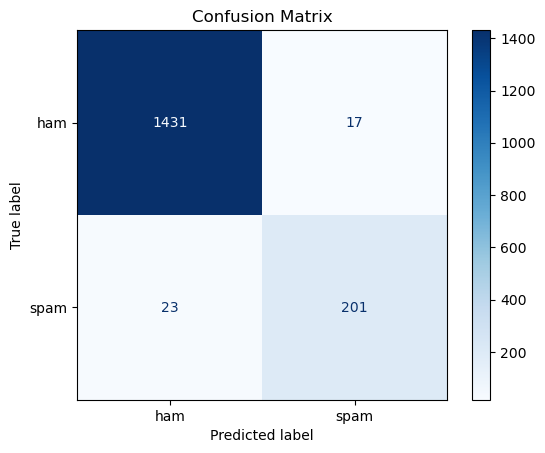

In [209]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix:

    True Positives (TP): 201 (bottom-right cell)
        The model correctly classified 201 messages as spam.
    True Negatives (TN): 1431 (top-left cell)
        The model correctly classified 1431 messages as ham.
    False Positives (FP): 17 (top-right cell)
        The model incorrectly classified 17 ham messages as spam.
    False Negatives (FN): 23 (bottom-left cell)
        The model incorrectly classified 23 spam messages as ham.

Interpretation:

    The model has a strong performance in classifying both ham and spam messages, but there are still a few misclassifications, especially for the minority spam class.

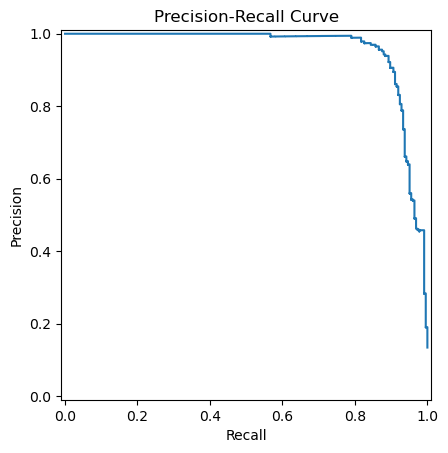

In [211]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label='spam')

# Plot Precision-Recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()


Precision-Recall Curve:

    Precision: Measures the ability of the classifier to avoid labeling as positive a sample that is actually negative.
    Recall: Measures the ability of the classifier to find all the positive samples.
    Curve Shape: The curve shows a high precision and recall at the left part of the curve, which indicates good performance when the threshold is high.
    Decline: As recall increases, precision starts to drop, indicating the trade-off between these two metrics.

Interpretation:

    The model performs well with high precision and recall at different thresholds. This indicates that the model is effective in identifying spam messages without significantly sacrificing precision.

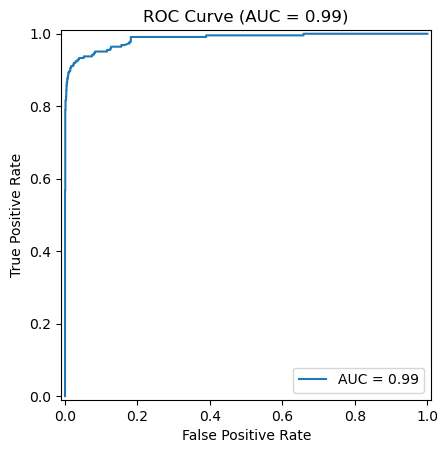

In [213]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label='spam')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.show()


ROC Curve (AUC = 0.99):

    True Positive Rate (TPR): Also known as recall, the ability of the model to correctly identify positive samples.
    False Positive Rate (FPR): The rate at which the model incorrectly labels negative samples as positive.
    AUC (Area Under the Curve): 0.99, which indicates excellent performance. An AUC close to 1 means the model is very effective in distinguishing between the classes.

Interpretation:

    The model has a high AUC value, showing that it has a strong ability to discriminate between ham and spam messages.

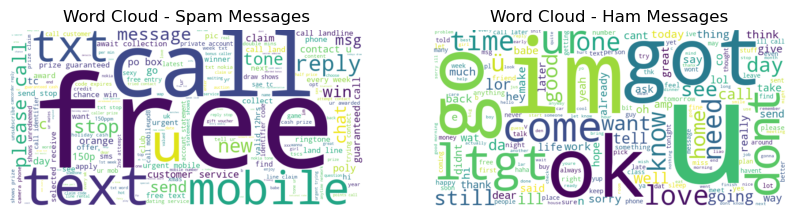

In [215]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate spam and ham messages
spam_text = ' '.join(spam[spam['Class'] == 'spam']['text_processed'])
ham_text = ' '.join(spam[spam['Class'] == 'ham']['text_processed'])

# Generate word clouds
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Plot the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Spam Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Ham Messages')
plt.axis('off')

plt.show()


Word Clouds:

    Spam Messages:
        Prominent words: "free", "call", "txt", "text", "mobile", etc.
        These words suggest typical characteristics of spam messages, which often include promotional content and action prompts like "call" or "text".

    Ham Messages:
        Prominent words: "ok", "u", "i’m", "go", "come", etc.
        These words are more conversational and informal, reflecting everyday communication.

Interpretation:

    The word clouds effectively highlight the distinguishing vocabulary used in spam vs. ham messages.
    The spam messages contain more promotional language, whereas ham messages reflect casual and personal language.

## Overall Analysis:

Confusion Matrix: The model performs well but could improve on reducing false negatives (misclassified spam).
    
Precision-Recall Curve: Good balance between precision and recall, especially at higher thresholds.
    
ROC Curve: Excellent performance overall with a high AUC value, indicating the model's strength in distinguishing between the classes.
   
Word Cloud: Provides an intuitive understanding of the most common terms in each class, helping to further confirm the nature of spam and ham messages.

## Some useful information about some evaluation metrics

1. Support:

    Definition: Support represents the number of actual instances of each class in the test dataset.
    Importance:
        Contextual Understanding: It helps understand the distribution of the classes in the test set. For example, in your case, there were 1448 ham messages and 224 spam messages.
        Performance Insight: Support is essential when interpreting metrics like precision, recall, and F1-score, as a model's performance on a class with very low support might not be reliable.
        Guiding Decision-Making: It helps in deciding whether additional techniques like oversampling or undersampling are needed for more robust model performance.

2. Macro Average:

    Definition: The macro average calculates the arithmetic mean of the precision, recall, and F1-score across all classes, treating each class equally.
    Formula: 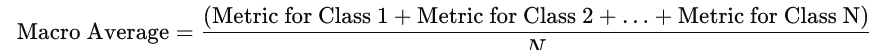

    Importance:
        Equal Weighting: Each class contributes equally to the final metric, regardless of its support. This is useful to understand the performance on each class independently.
        Useful for Imbalanced Data: It gives insight into how the model performs across all classes, especially when the dataset is imbalanced. It highlights if the model performs well on the minority class, even when the majority class dominates.
        Model Fairness: It ensures that the model's performance on smaller classes is considered equally, helping avoid the neglect of minority classes.

3. Weighted Average:

    Definition: The weighted average calculates the mean of the precision, recall, and F1-score across all classes, weighted by the number of instances (support) of each class.
    Formula:  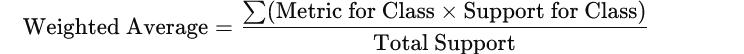

    Importance:
        Reflects True Performance: This metric gives a better overall picture of the model's performance on the entire dataset, taking into account the imbalance in class distribution.
        Bias Towards Major Class: It shows how well the model performs on the dataset as a whole, giving more importance to classes with more instances. In imbalanced datasets, it might skew towards the majority class but still provides a realistic picture of overall model performance.
        Business Impact: For many real-world applications, correctly predicting the majority class can be more critical, and weighted averages can give an indication of overall model reliability.

Choosing the Right Metric:

    Macro Average: Useful if you want to ensure good performance across all classes, regardless of class size.
    Weighted Average: Ideal for understanding overall model performance, especially when class imbalance reflects real-world scenarios.
    Support: Provides context and helps to interpret other metrics correctly.

Conclusion:

    Macro Average is ideal for evaluating the model's ability to handle all classes equally.
    Weighted Average gives a realistic view of overall performance, particularly for imbalanced datasets.
    Support is necessary for understanding the distribution and how it might affect performance metrics.

# Next Steps:

In [ ]:
You can further tune the model, try different algorithms, or use additional feature engineering techniques.
   
Consider further reducing the false negatives, as missing a spam message is often more critical than falsely classifying a ham message as spam.